In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
df = pd.read_csv(r'\Users\DELL\Downloads\Crop Production data.csv')
df.head(7)

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0
5,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Coconut,18168.0,65100000.0
6,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Dry ginger,36.0,100.0


In [3]:
df.shape

(246091, 7)

In [4]:
df.describe()

,Crop_Year,Area,Production
count,246091.000000,2.460910e+05,2.423610e+05
mean,2005.643018,1.200282e+04,5.825034e+05
std,4.952164,5.052340e+04,1.706581e+07
min,1997.000000,4.000000e-02,0.000000e+00
25%,2002.000000,8.000000e+01,8.800000e+01
50%,2006.000000,5.820000e+02,7.290000e+02
75%,2010.000000,4.392000e+03,7.023000e+03
max,2015.000000,8.580100e+06,1.250800e+09


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246091 entries, 0 to 246090
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   State_Name     246091 non-null  object 
 1   District_Name  246091 non-null  object 
 2   Crop_Year      246091 non-null  int64  
 3   Season         246091 non-null  object 
 4   Crop           246091 non-null  object 
 5   Area           246091 non-null  float64
 6   Production     242361 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 13.1+ MB


In [6]:
df.isnull().sum()

State_Name          0
District_Name       0
Crop_Year           0
Season              0
Crop                0
Area                0
Production       3730
dtype: int64

In [7]:
df['Production'] = df['Production'].fillna(df['Production'].mean())

In [8]:
df.isnull().sum()

State_Name       0
District_Name    0
Crop_Year        0
Season           0
Crop             0
Area             0
Production       0
dtype: int64

In [9]:
Q1 = df['Production'].quantile(0.25)
Q3 = df['Production'].quantile(0.75)
IQR = Q3 - Q1


In [10]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df_no_outliers = df[(df['Production'] >= lower_bound) & (df['Production'] <= upper_bound)]
print("Shape after removing outliers:", df_no_outliers.shape)

Shape after removing outliers: (202304, 7)


df

In [11]:
df_sam = df.sample(frac=0.1, random_state=42)

                                            Yield Calculations:

In [12]:
df_sam['Yield'] = df_sam['Production'] / df_sam['Area']
df_sam['Yield']

96862      0.745098
109879     0.000000
1543       0.353293
4688      13.548327
230491     0.559322
            ...    
7823       0.075221
94652      2.166978
185074    82.388722
179875     1.044803
227147    12.989362
Name: Yield, Length: 24609, dtype: float64

                                          Calculate mean yield by crop :

In [13]:
mean_yield_by_crop = df_sam.groupby('Crop')['Yield'].mean().reset_index()
mean_yield_by_crop_sorted = mean_yield_by_crop.sort_values(by='Yield', ascending=False)
mean_yield_by_crop_sorted

,Crop,Yield
15,Blackgram,34341.661512
61,Moth,33391.994823
19,Cardamom,24148.020538
99,Sugarcane,23794.668913
93,Sannhamp,23161.826557
...,...,...
74,Peas (vegetable),0.000000
111,Water Melon,0.000000
3,Ash Gourd,0.000000
113,Yam,0.000000


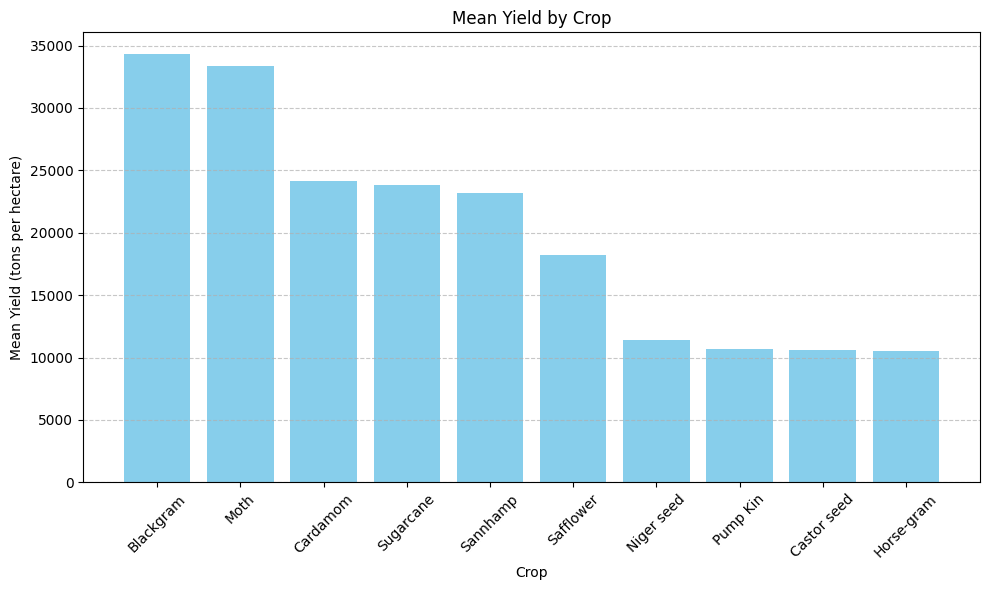

In [23]:
plt.figure(figsize=(10, 6))
plt.bar(mean_yield_by_crop_sorted['Crop'].values[:10], mean_yield_by_crop_sorted['Yield'].values[:10], color='skyblue')
plt.xlabel('Crop')
plt.ylabel('Mean Yield (tons per hectare)')
plt.title('Mean Yield by Crop')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [15]:
mean_yield_by_year_crop = df_sam.groupby(['Crop_Year', 'Crop'])['Yield'].mean().reset_index()


In [16]:
best_crops_each_year = mean_yield_by_year_crop.loc[mean_yield_by_year_crop.groupby('Crop_Year')['Yield'].idxmax()]

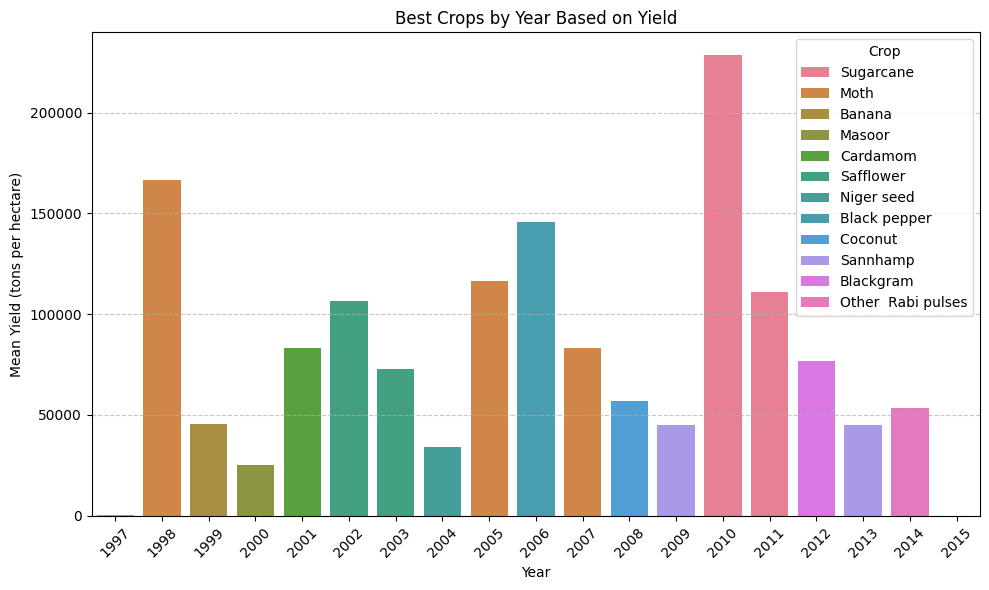

In [26]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Crop_Year', y='Yield', hue='Crop', data=best_crops_each_year, dodge=False)
plt.xlabel('Year')
plt.ylabel('Mean Yield (tons per hectare)')
plt.title('Best Crops by Year Based on Yield')
plt.legend(title='Crop')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [18]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df_sam['State_Name'] = label_encoder.fit_transform(df_sam['State_Name'])
df_sam['District_Name'] = label_encoder.fit_transform(df_sam['District_Name'])
df_sam['Season'] = label_encoder.fit_transform(df_sam['Season'])
df_sam['Crop'] = label_encoder.fit_transform(df_sam['Crop'])

In [19]:
from sklearn.model_selection import train_test_split
x = df_sam.drop(['Production'], axis=1)
y = df_sam['Production']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [20]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [21]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(y_pred)

[1.4210290e+03 5.0434820e+02 1.1116000e+01 ... 3.1969200e+02 1.6271612e+05
 1.5300000e+01]


In [22]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("R-squared (R²):", r2)

Mean Absolute Error (MAE): 144176.85589578914
Mean Squared Error (MSE): 21036503586351.344
R-squared (R²): 0.8551131666430425
